In [1]:
%matplotlib inline

In [ ]:
import os, sys
module_path = os.path.abspath(os.path.join('..', '..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
pd.options.display.html.table_schema = True
pd.options.display.max_rows = 10
pd.options.display.max_columns = 5

In [ ]:
from fbprophet import Prophet

In [3]:
from climate import read

In [4]:
data_file = 'SIMAR_1052046'
full_data_path = os.path.join('..', '..', '..', '..', 'data', 'locations', 'eg', 'waves_wind')

data_simar, code = read.simar(data_file, path=full_data_path)

In [5]:
data_simar

,Hm0,Tp,DirM,VelV,DirV
AA_MM_DD_HH,,,,,
1958-01-04 00:00:00,2.1,10.8,249.0,7.9,172.0
1958-01-04 01:00:00,2.1,10.6,250.0,7.5,170.0
1958-01-04 02:00:00,2.1,10.6,251.0,7.1,169.0
1958-01-04 03:00:00,2.1,10.6,252.0,6.7,167.0
1958-01-04 04:00:00,2.1,10.6,253.0,6.3,162.0
1958-01-04 05:00:00,2.1,10.6,254.0,6.4,157.0
1958-01-04 06:00:00,2.1,10.6,254.0,6.4,151.0
1958-01-04 07:00:00,2.1,10.5,255.0,6.6,141.0
1958-01-04 08:00:00,2.1,10.5,255.0,6.9,133.0


In [6]:
df = data_simar['Hm0'].reset_index()
df.columns = ['ds', 'y']

In [7]:
df

,ds,y
0,1958-01-04 00:00:00,2.1
1,1958-01-04 01:00:00,2.1
2,1958-01-04 02:00:00,2.1
3,1958-01-04 03:00:00,2.1
4,1958-01-04 04:00:00,2.1
5,1958-01-04 05:00:00,2.1
6,1958-01-04 06:00:00,2.1
7,1958-01-04 07:00:00,2.1
8,1958-01-04 08:00:00,2.1
9,1958-01-04 09:00:00,2.1


In [8]:
m = Prophet()
m.fit(df)

/Users/pedro/anaconda/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [ ]:
future = m.make_future_dataframe(periods=365)

In [ ]:
future

In [10]:
forecast = m.predict(future)

,ds,yhat,yhat_lower,yhat_upper
0,1958-01-04 00:00:00,1.489067,0.646852,2.330876
1,1958-01-04 01:00:00,1.494328,0.693780,2.288018
2,1958-01-04 02:00:00,1.498383,0.656221,2.284118
3,1958-01-04 03:00:00,1.500626,0.657278,2.333589
4,1958-01-04 04:00:00,1.499959,0.651841,2.318980
5,1958-01-04 05:00:00,1.495854,0.663574,2.390262
6,1958-01-04 06:00:00,1.488956,0.657178,2.341401
7,1958-01-04 07:00:00,1.480653,0.715471,2.338241
8,1958-01-04 08:00:00,1.472059,0.616817,2.252322
9,1958-01-04 09:00:00,1.463323,0.590271,2.344584


In [11]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1958-01-04 00:00:00,1.489067,0.646852,2.330876
1,1958-01-04 01:00:00,1.494328,0.693780,2.288018
2,1958-01-04 02:00:00,1.498383,0.656221,2.284118
3,1958-01-04 03:00:00,1.500626,0.657278,2.333589
4,1958-01-04 04:00:00,1.499959,0.651841,2.318980
5,1958-01-04 05:00:00,1.495854,0.663574,2.390262
6,1958-01-04 06:00:00,1.488956,0.657178,2.341401
7,1958-01-04 07:00:00,1.480653,0.715471,2.338241
8,1958-01-04 08:00:00,1.472059,0.616817,2.252322
9,1958-01-04 09:00:00,1.463323,0.590271,2.344584


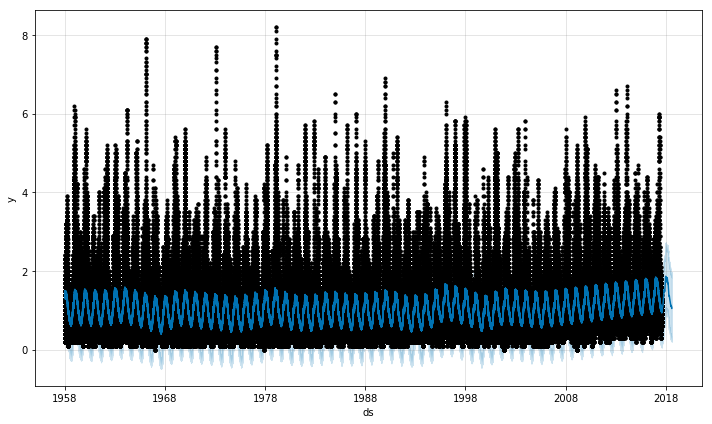

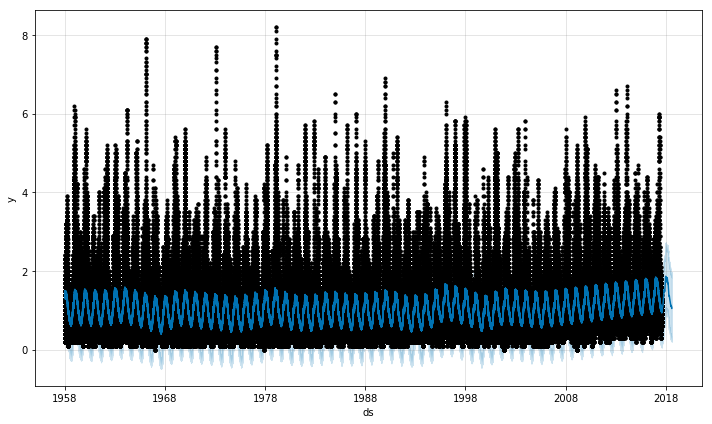

In [12]:
m.plot(forecast)

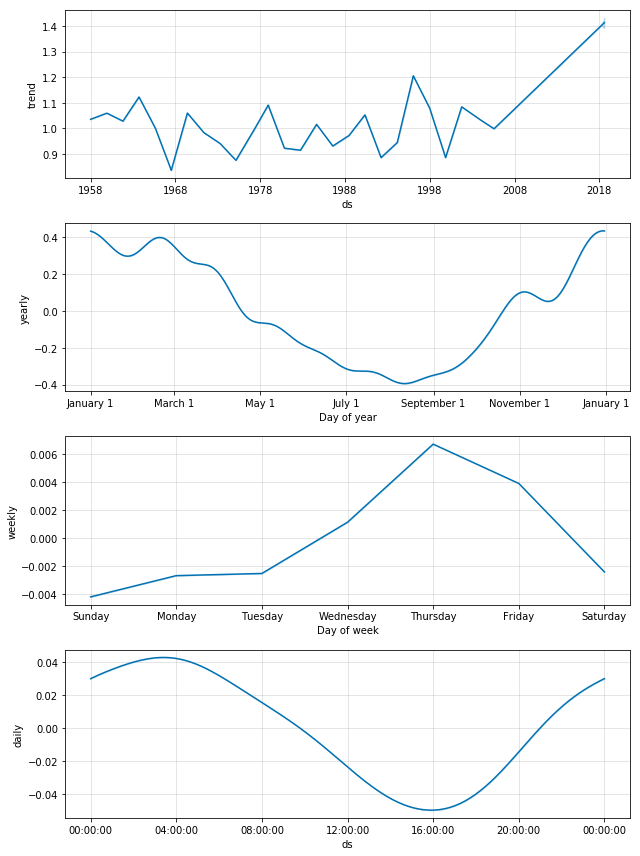

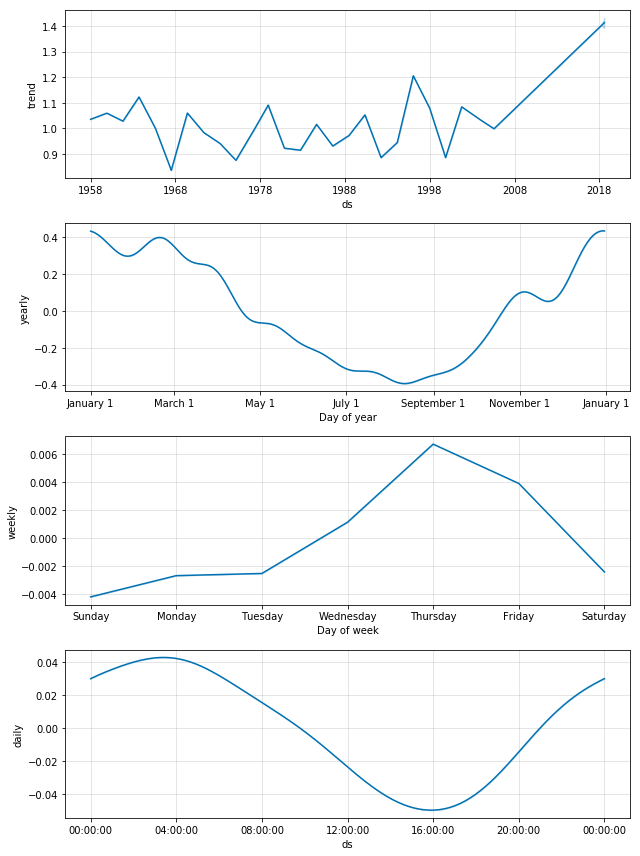

In [13]:
m.plot_components(forecast)